# Data loading and comprehension

In [346]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import warnings

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

In [347]:
bike = pd.read_csv('C://Users/dell/Downloads/day.csv')

In [348]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [349]:
#checking the shape of dataframe
bike.shape

(730, 16)

In [350]:
#Getting the columns info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [351]:
#Describ
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [352]:
#Checking the null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [353]:
# Renaming the columns for better reading
bike.rename(columns={'yr':'year', 'mnth':'month', 'hum':'humidity'}, inplace=True)

In [354]:
# Checing the column names that we renamed 
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dropping the unwanted columns

In [355]:
#instant is an index of the row and dteday having dates which we can also get by month and year columns, 
#casual and  registered columns 
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [356]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [357]:
#Encoding weathersit, season, month, weekday
bike.weathersit = bike.weathersit.map({1:'Clear', 2:'Cloudy', 3:'Light Snow', 4:'Heavy Rain'})
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.month = bike.month.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec' })    
bike.weekday = bike.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thur', 5:'fri', 6:'sat' })
    

In [358]:
#checking the head of the dataset
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [359]:
#checking the columns details
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Visualising the data

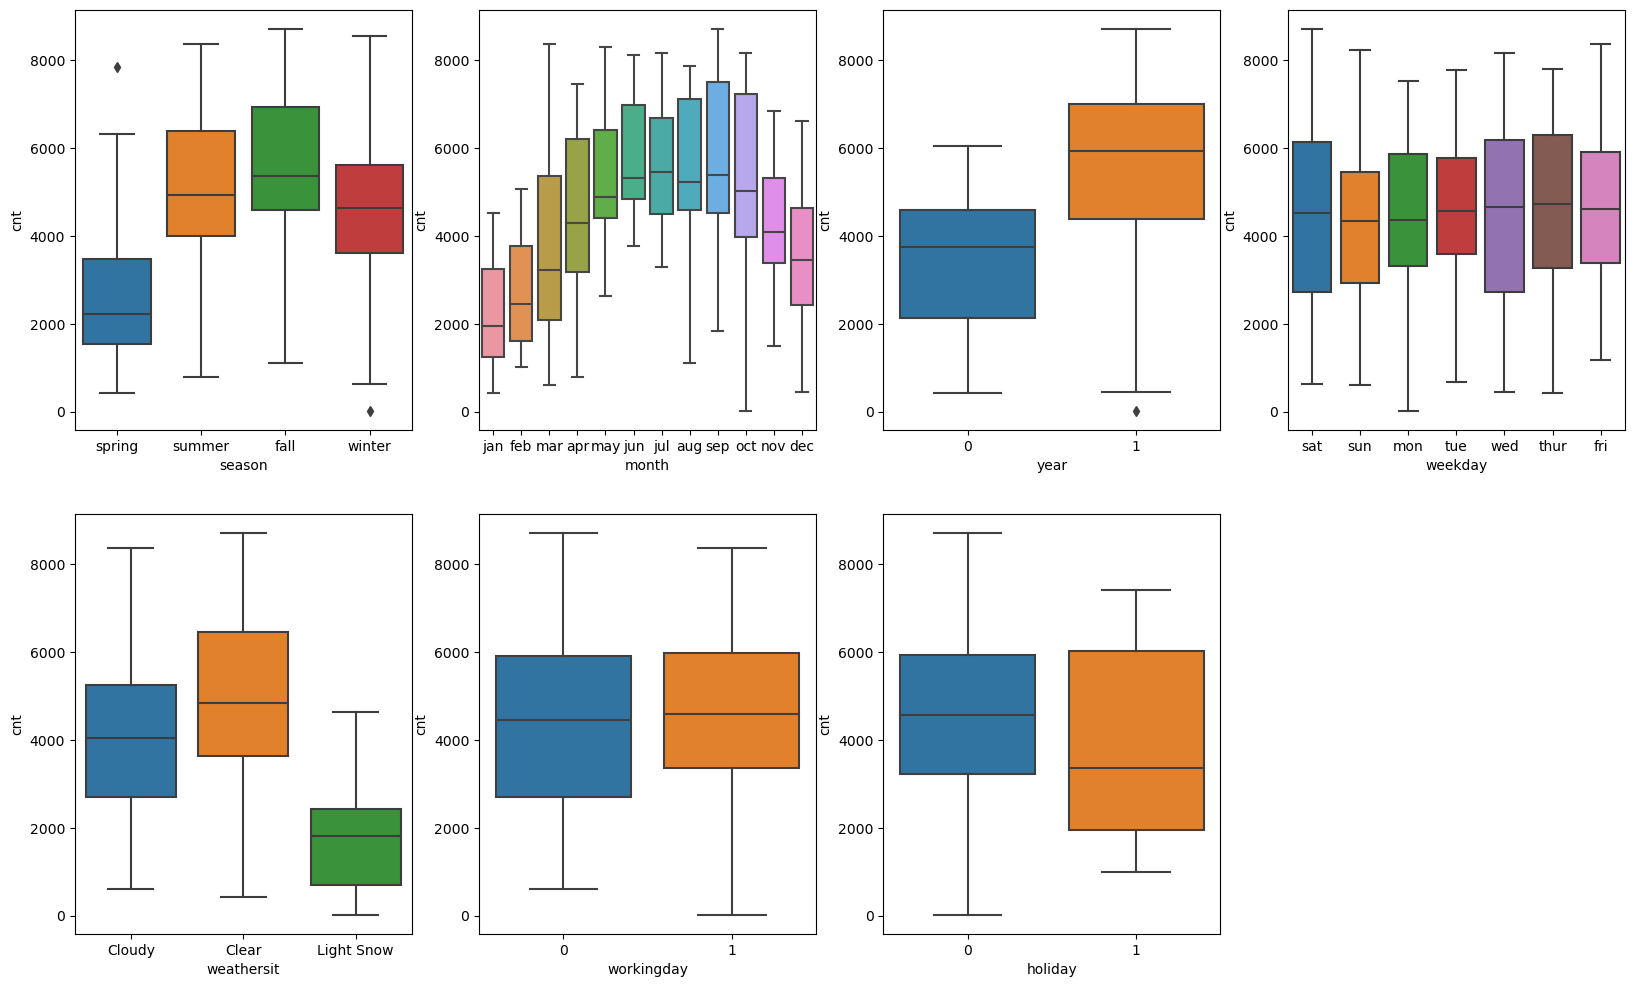

In [360]:
# Let's visualise the category columns 
# and assess how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y='cnt', data=bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y='cnt', data=bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'year', y='cnt', data=bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y='cnt', data=bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y='cnt', data=bike)
plt.subplot(2,4,6 )
sns.boxplot(x = 'workingday', y='cnt', data=bike)
plt.subplot(2,4,7 )
sns.boxplot(x = 'holiday', y='cnt', data=bike)
plt.show()



In [361]:
# creating a function for barplot  to categorical columns

def plot_bar_chart(vals):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=vals, y='cnt', data=bike)
    plt.subplot(1,2,2)
    sns.barplot(x=vals, y='cnt', data=bike, hue='year')
    plt.legend(labels=['2018', '2019'])
    plt.show()


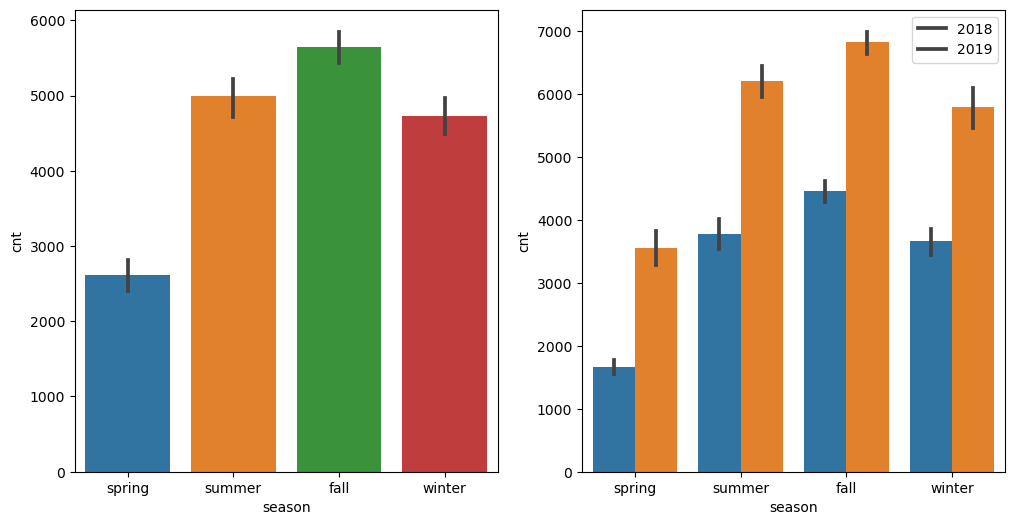

In [362]:
# plotting visualization for season column

plot_bar_chart('season')

It seems fall season has more number of bookings and in each season booking number is increased Significantly from 2018 to 2019

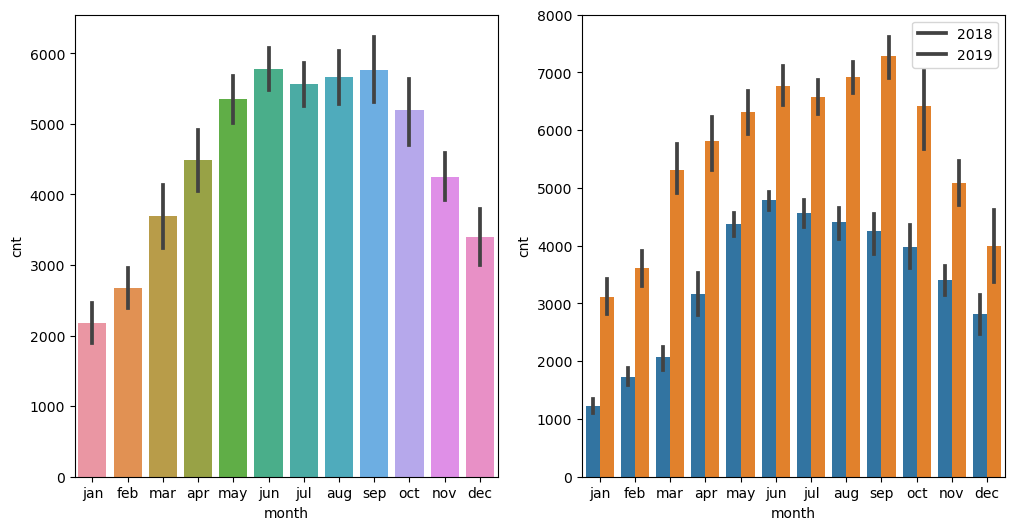

In [363]:
# plotting visualization for month column

plot_bar_chart('month')

We can see most number of bookings were done in May, Jul, Aug, Sep and Oct. There is a clear trend that booking started increasing from jan till Oct and in number it started decreasing. There is a significant increase in number of booking for each from 2018 to 2019

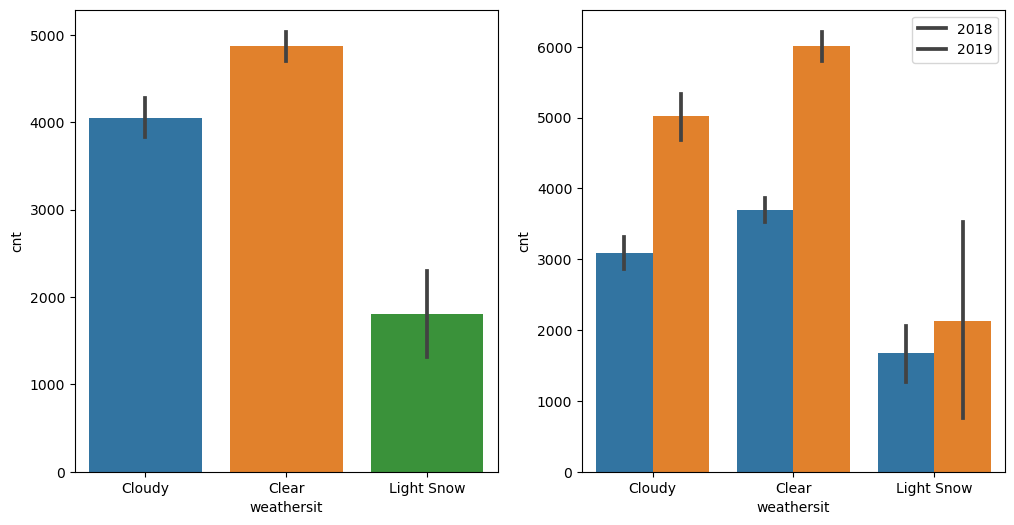

In [364]:
# plotting visualization for weatherist column

plot_bar_chart('weathersit')

Most number of bookings were done when weather is clear. There is a clear trend that booking started increasing from jan till Oct and in number it started decreasing. There is a significant increase in number of booking for each from 2018 to 2019

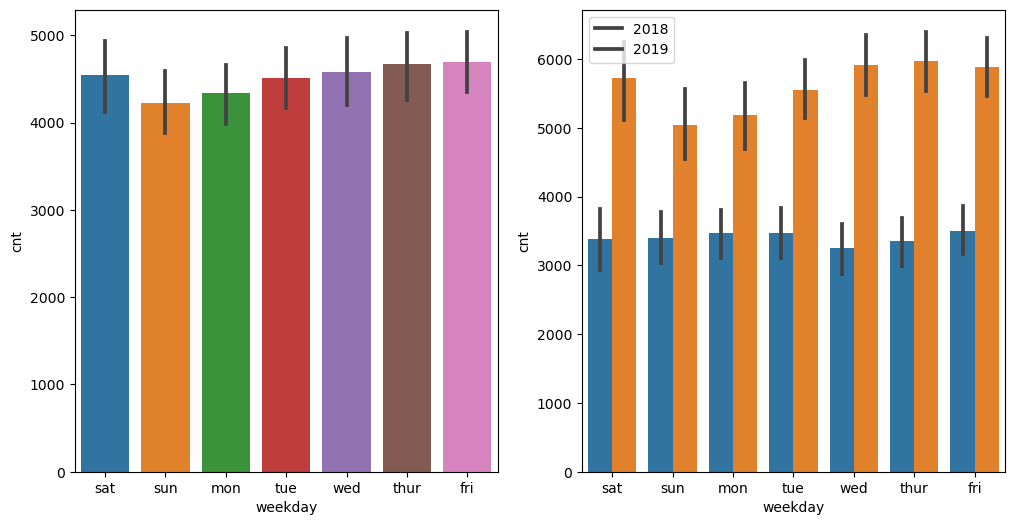

In [365]:
# plotting visualization for weekday column

plot_bar_chart('weekday')

Thur, Fri and Sat have attaracted more number of bookings.

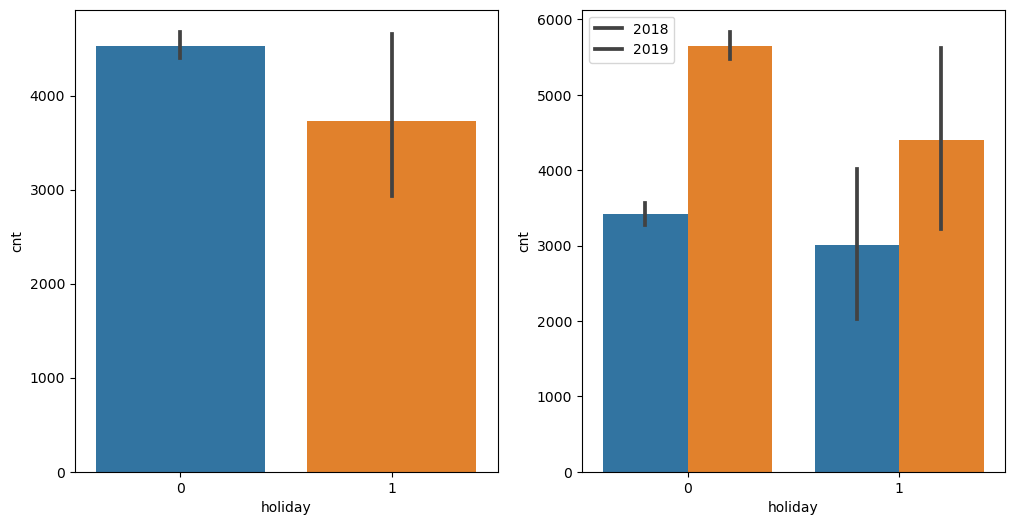

In [366]:
# plotting visualization for holiday column

plot_bar_chart('holiday')

During holiday the number of bookings are less and it seems reasonable becasue people want to spend time at home with family.


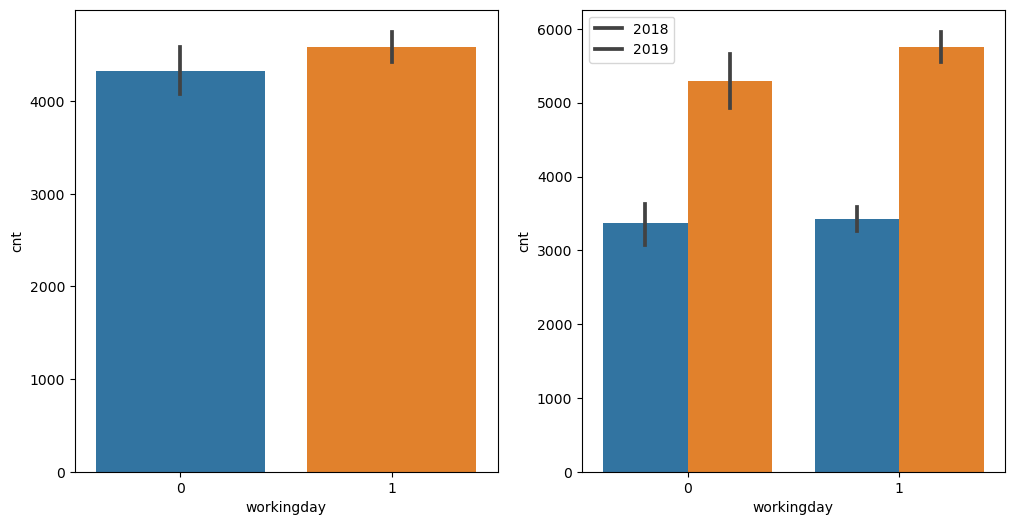

In [367]:
# plotting visualization for workingday column

plot_bar_chart('workingday')

The booking seems to be approximately same if it's a workingday or non-workingday, however number of bookings have increased from 2018 to 2019

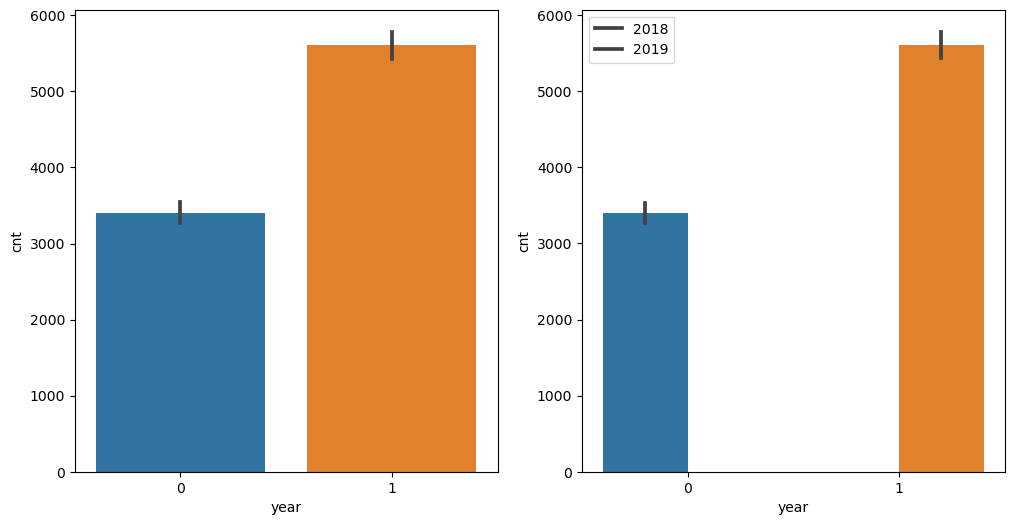

In [368]:
# plotting visualization for year column

plot_bar_chart('year')

from business point of view, we can see proress from 2018 to 2019 which is good for the bussiness

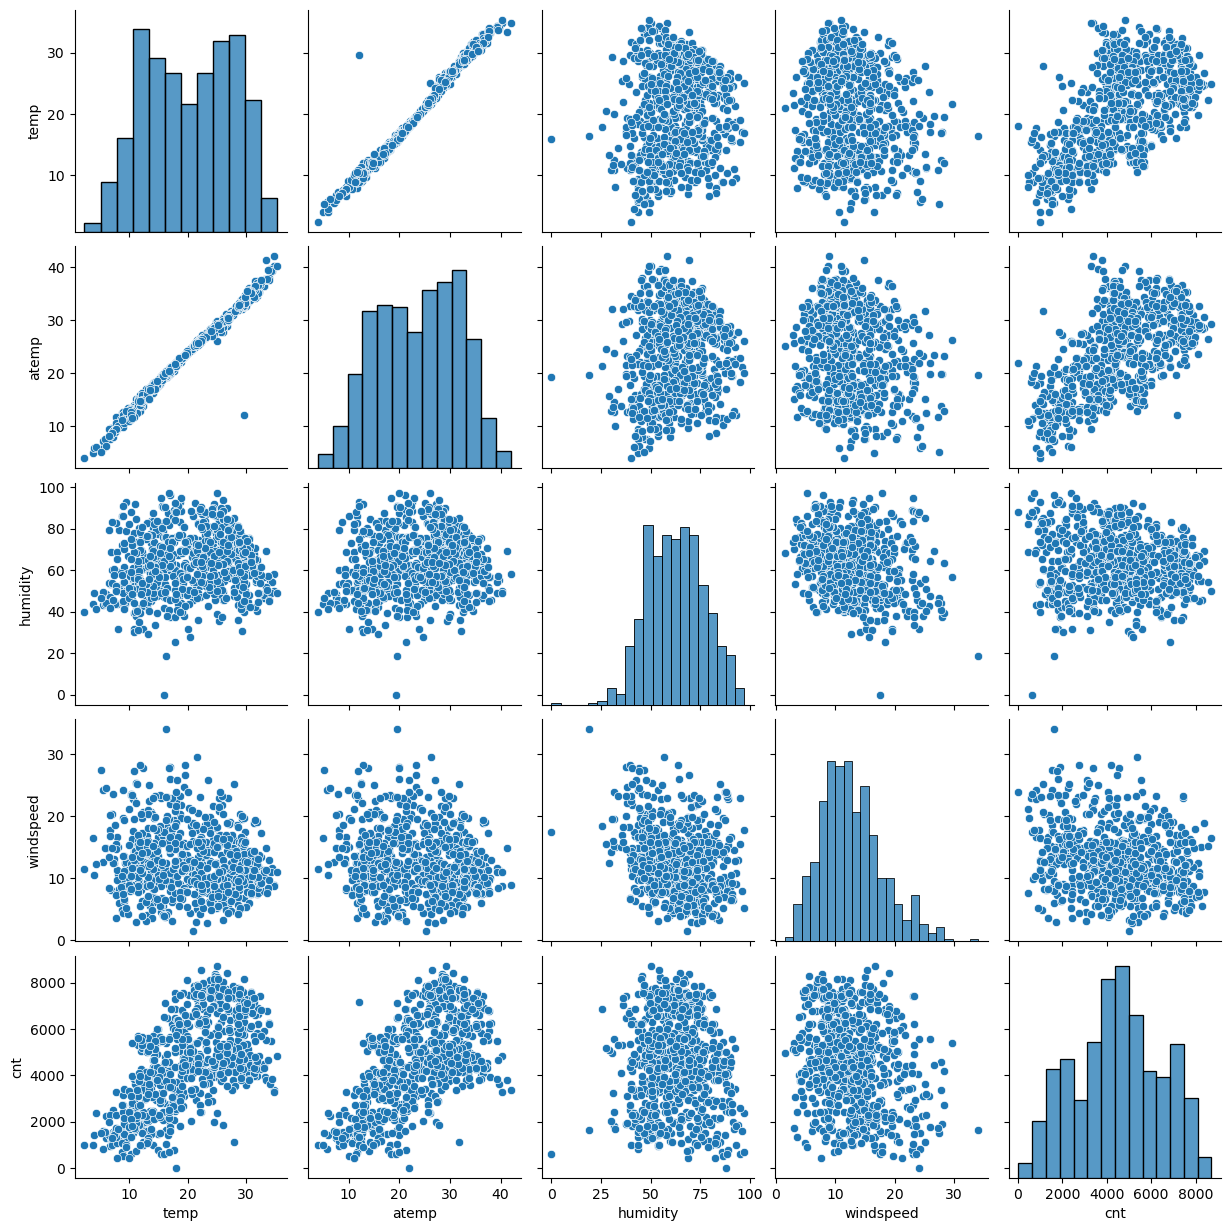

In [369]:
# Let's analyse the numberical columns
sns.pairplot(data=bike, vars=['temp', 'atemp', 'humidity', 'windspeed', 'cnt'])
plt.show()

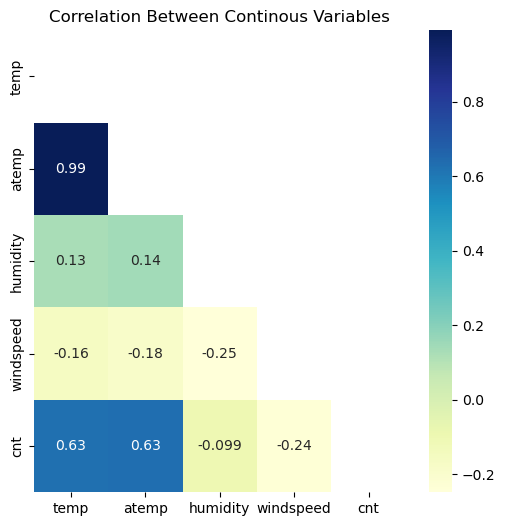

In [370]:
# Let's check the correlation between numerical variables

plt.figure(figsize=(6,6))
matrix = np.triu(bike[['temp', 'atemp', 'humidity', 'windspeed','cnt']].corr())
sns.heatmap(bike[['temp', 'atemp', 'humidity', 'windspeed','cnt']].corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.title('Correlation Between Continous Variables')
plt.show()

#### There is a linear relation between temp and atemp variables hence both can't be used in model as there is multicolinearity. It will be decided on the basis of p-value and VIF with respect to variables.

## Data Preparation

In [371]:
#Creating dummy variables for season, month, weekday and weathersit

month_data = pd.get_dummies(bike['month'], drop_first=True)
weekday_data = pd.get_dummies(bike['weekday'], drop_first=True)
weathersit_data = pd.get_dummies(bike['weathersit'], drop_first=True)
season_data = pd.get_dummies(bike['season'], drop_first=True)

In [372]:
#Merging the new dummy variables with dataframe

bike_df = pd.concat([bike, month_data, weekday_data,weathersit_data,season_data], axis = 1)

In [373]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thur,tue,wed,Cloudy,Light Snow,spring,summer,winter
0,spring,0,jan,0,sat,0,Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,1,0,1,0,0
1,spring,0,jan,0,sun,0,Cloudy,14.902598,17.68695,69.6087,...,0,1,0,0,0,1,0,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [374]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  jul         730 non-null    uint8  
 17  jun         730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

In [375]:
# As we have created dummy variables hecne we can drop not required column
bike_df.drop(['season','month','weekday','weathersit'], axis=1, inplace = True)

In [376]:
#checking the head of the dataframe

bike_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thur,tue,wed,Cloudy,Light Snow,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [377]:
bike_df.shape

(730, 30)

In [378]:
# check the column info of new dataframe 

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    uint8  
 9   dec         730 non-null    uint8  
 10  feb         730 non-null    uint8  
 11  jan         730 non-null    uint8  
 12  jul         730 non-null    uint8  
 13  jun         730 non-null    uint8  
 14  mar         730 non-null    uint8  
 15  may         730 non-null    uint8  
 16  nov         730 non-null    uint8  
 17  oct         730 non-null    uint8  
 18  sep         730 non-null    uint8  
 19  mon         730 non-null    u

## Spiltting the dataframe in to Test and Train


In [379]:
# Spiltting the dataframe in to Test and Train

np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size=0.7, random_state=100)

In [380]:
#checking the shape of training dataset
df_train.shape

(510, 30)

In [381]:
#checking the shape of testing dataset
df_test.shape


(220, 30)

In [382]:
#using the MinMaxScaler for rescaling the features 
scaler = MinMaxScaler()

In [383]:
# Applying the scaler() to columns except dummy variables and 'yes/no' variables()

num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [384]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thur,tue,wed,Cloudy,Light Snow,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,1,0,0,1,0


In [385]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thur,tue,wed,Cloudy,Light Snow,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


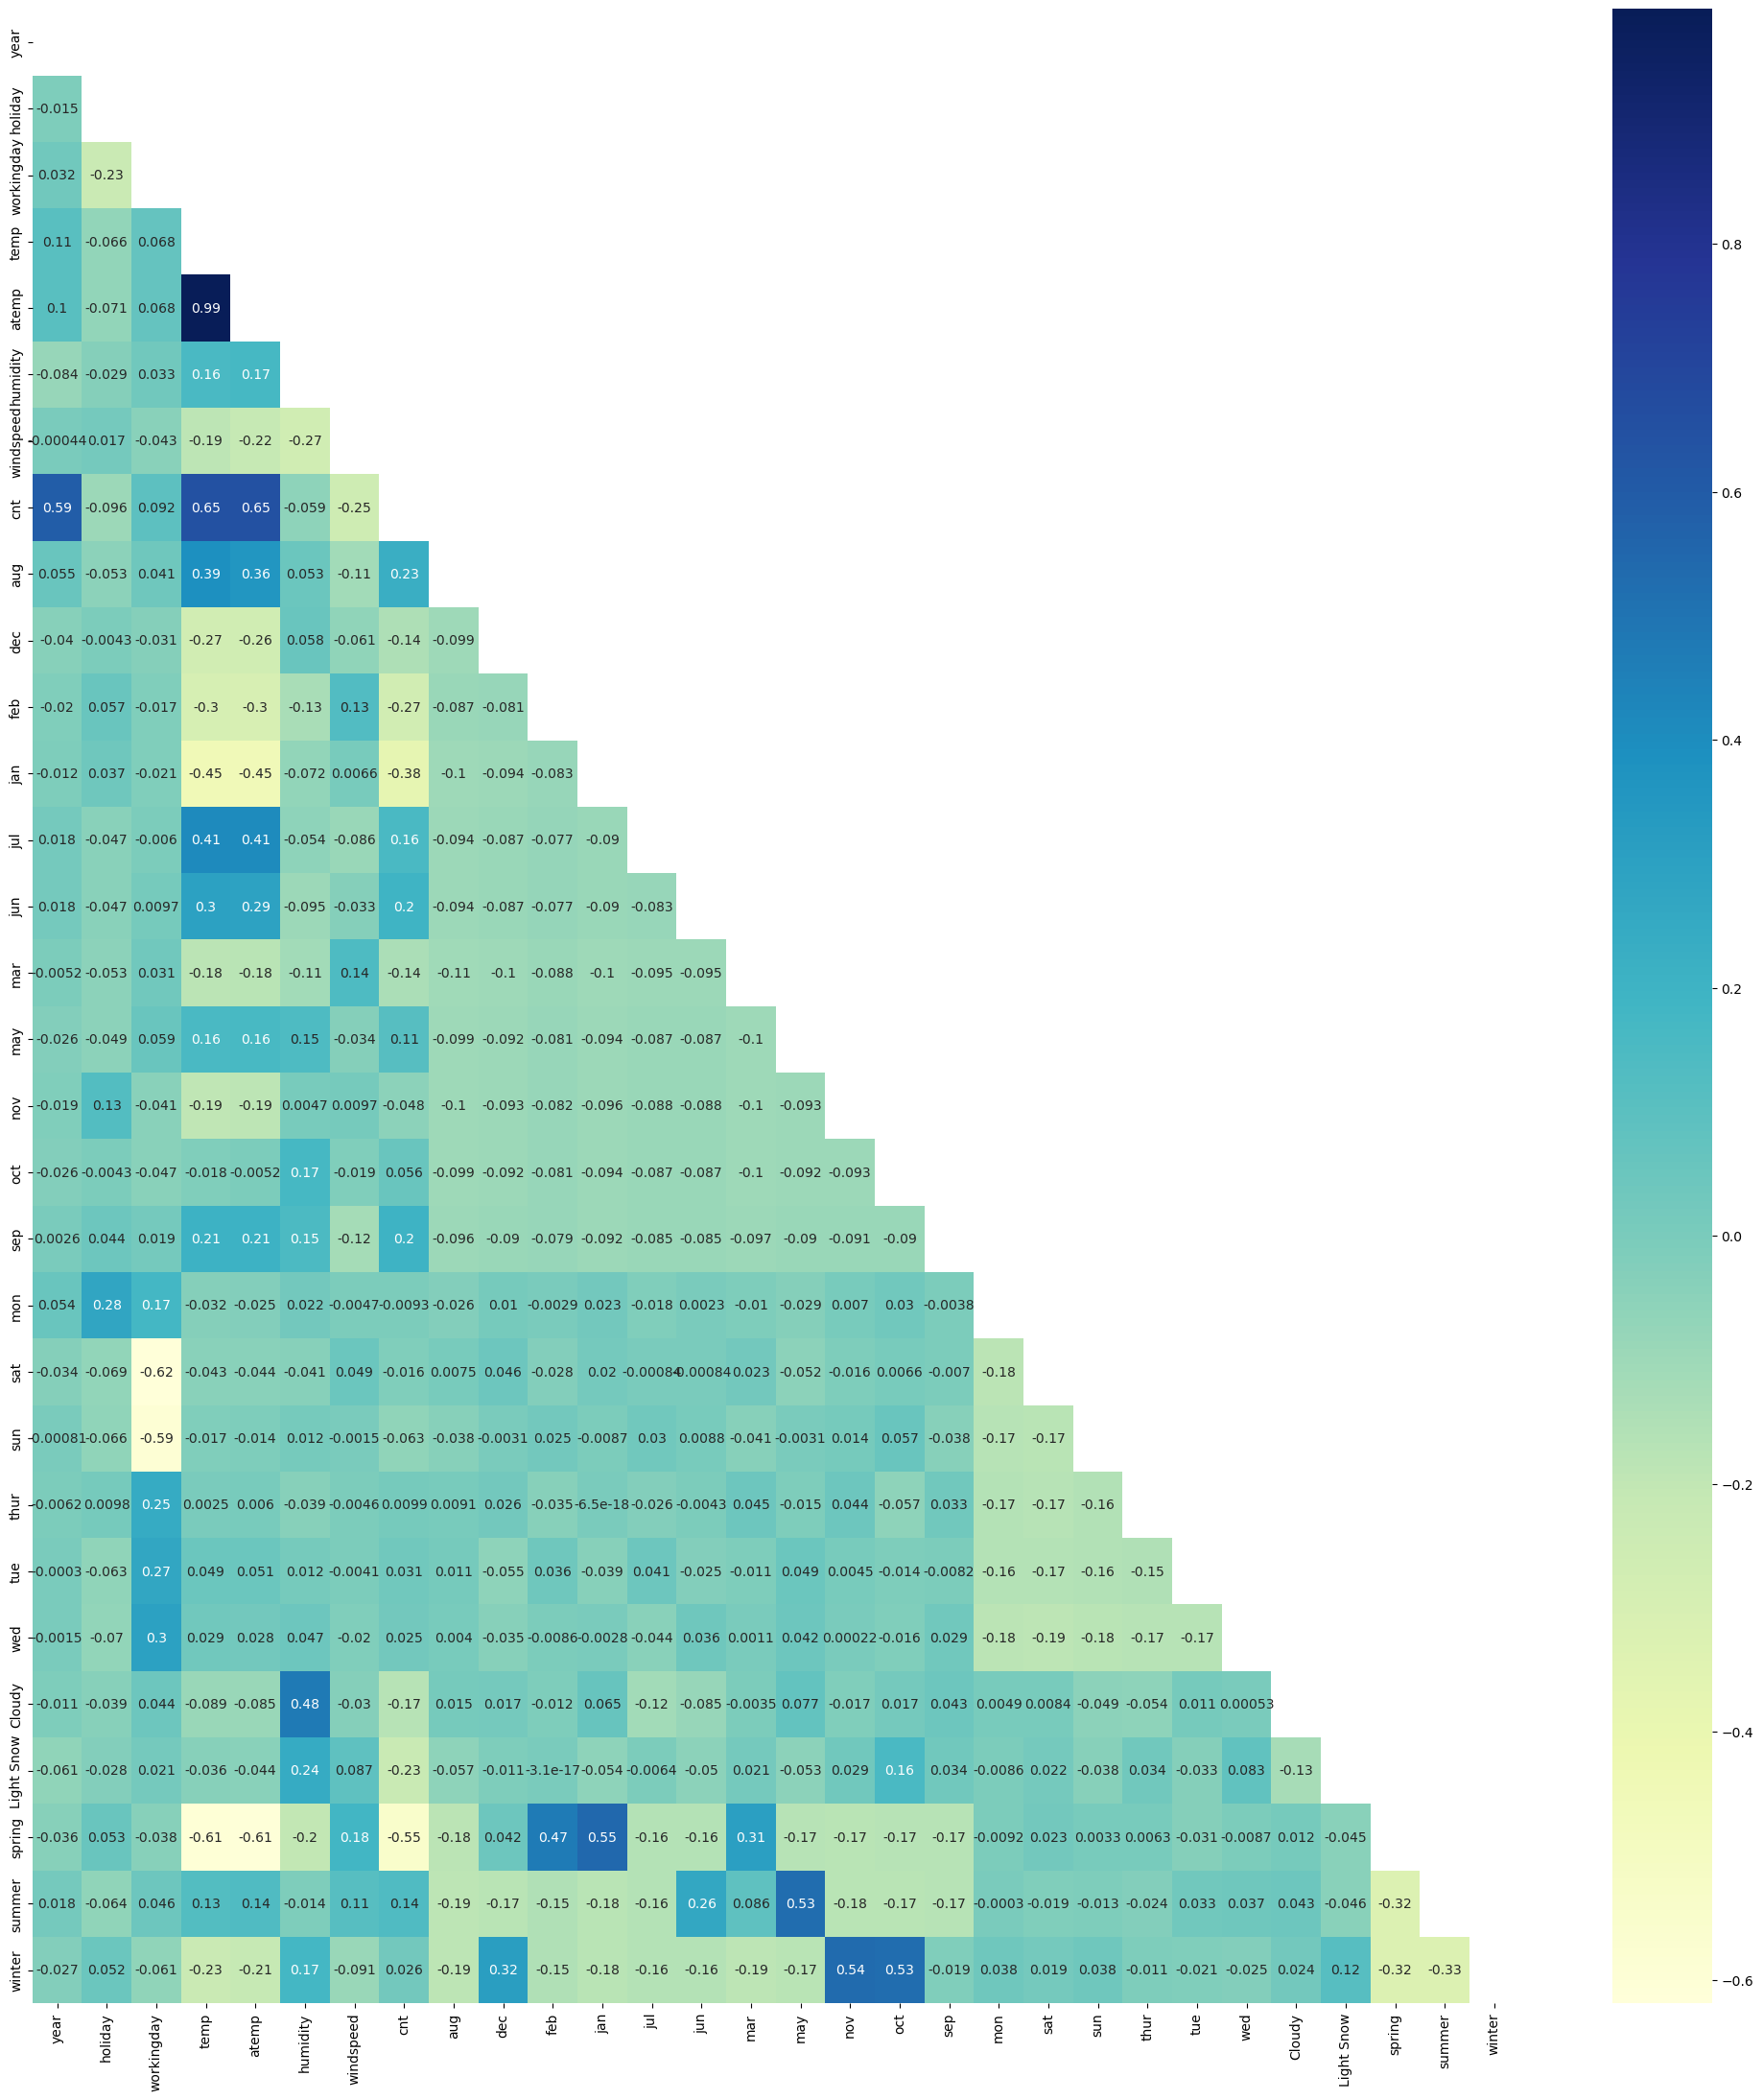

In [386]:
#Let's check the correlation coefficients to see how variables are correlated 
plt.figure(figsize=(25,27))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

#### cnt seems to have correlation with year variable and temp. Misty and humidity showing correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

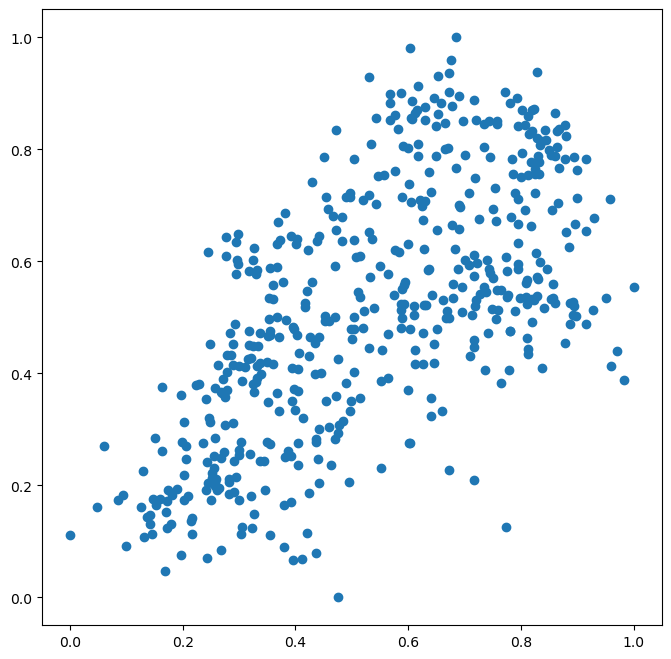

In [387]:
#Visualising one of the correlation to see the trend 
plt.figure(figsize=[8,8])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

from the scatter plot we can see a positive corelation between temp and cnt varaibles

In [388]:
#let's creae a linear  Model

y_train = df_train.pop('cnt')
X_train = df_train

In [389]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,  n_features_to_select=14, step=1)
rfe = rfe.fit(X_train, y_train)


In [390]:
# selecting the list variables selected  in top 14
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 15),
 ('mar', False, 16),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', False, 9),
 ('thur', False, 12),
 ('tue', False, 11),
 ('wed', False, 13),
 ('Cloudy', True, 1),
 ('Light Snow', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [391]:
# Selecting the selected variables via REF in column list
colmn = X_train.columns[rfe.support_]
print(colmn)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jul',
       'sep', 'sat', 'Cloudy', 'Light Snow', 'spring', 'summer', 'winter'],
      dtype='object')


In [392]:
# checking the rejected columns

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'sun', 'thur', 'tue', 'wed'],
      dtype='object')

In [393]:
def calculate_vif(bk_data):
    vif = pd.DataFrame()
    vif['Features'] = bk_data.columns
    vif['VIF'] = [variance_inflation_factor(bk_data.values, i) for i in range(bk_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending= False)
    return vif

In [394]:
X_train_rfe = X_train[colmn]
X_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thur', 'tue', 'wed',
       'Cloudy', 'Light Snow', 'spring', 'summer', 'winter'],
      dtype='object')

In [395]:
#Calculate the vif
calculate_vif(X_train_rfe)

,Features,VIF
4,humidity,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
11,spring,4.24
13,winter,3.42
12,summer,2.85
9,Cloudy,2.29
0,year,2.08
8,sat,1.97


humidity showing the high VIF value

## Building a linear model

In [396]:
# Building our 1st linear regression model

X_train_lm = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.11e-191
Time:                        21:54:09   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2402      0.036      6.714      0.0

In [397]:
# As weekday shows high VIF values hence we can drop it
X_train_data = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_vif(X_train_data)

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.34
0,year,2.07
12,winter,1.98
7,sat,1.96
5,jul,1.58
8,Cloudy,1.57


VIF values seems good now. Let's check further if we can reduce futher

In [398]:
# Building our 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_data)
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.28e-188
Time:                        21:54:09   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1576      0.031      5.126      0.0

In [399]:
# As holiday shows high VIF values hence we can drop it
X_train_data = X_train_data.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_vif(X_train_data)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,year,2.07
11,winter,1.91
6,sat,1.83
4,jul,1.58
7,Cloudy,1.57


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [400]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_data)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          7.12e-189
Time:                        21:54:09   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.031      4.881      0.0

In [401]:
# As jul shows high VIF values hence we can drop it
X_train_data = X_train_data.drop(['jul'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_vif(X_train_data)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
6,Cloudy,1.57
4,sep,1.23


In [402]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_data)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.42e-188
Time:                        21:54:10   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1406      0.031      4.597      0.0

#### We can cosider the above model 4 i.e lr_4, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

### F-Statistics value of 233.6 (which is greater than 1) and the p-value of 1.42e-188 i.e almost equals to zero, states that the overall model is significant

In [403]:
# Checking the parameters and their coefficient values
lr_4.params

const         0.140578
year          0.234402
workingday    0.055472
temp          0.479554
windspeed    -0.150006
sep           0.087256
sat           0.066696
Cloudy       -0.080390
Light Snow   -0.289256
spring       -0.055396
summer        0.062598
winter        0.095793
dtype: float64

## Residual Analysis of the train data and validation

In [404]:
X_train_lm_4

,const,year,workingday,temp,windspeed,sep,sat,Cloudy,Light Snow,spring,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,1,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,1,1,0,0,1,0
111,1.0,0,1,0.345824,0.380981,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,1,1,0,0,0,1
79,1.0,0,1,0.462664,0.529881,0,0,1,0,0,1,0


In [405]:
y_train_pred = lr_4.predict(X_train_lm_4)

#### Normality of error terms

Text(0.5, 0, 'Errors')

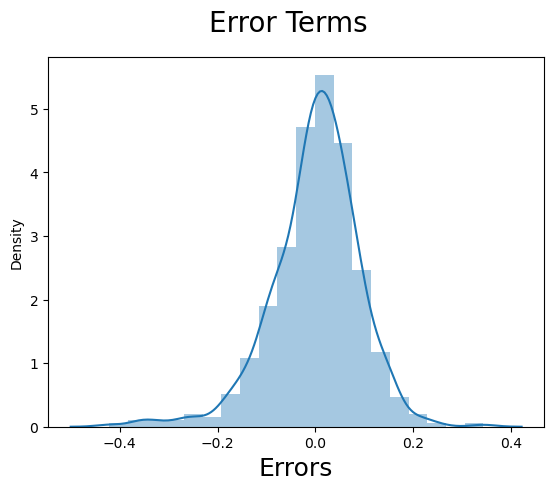

In [406]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Normal distribution pattern is being followed by error terms.

### Multi Colinearity

In [407]:
calculate_vif(X_train_data)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
6,Cloudy,1.57
4,sep,1.23


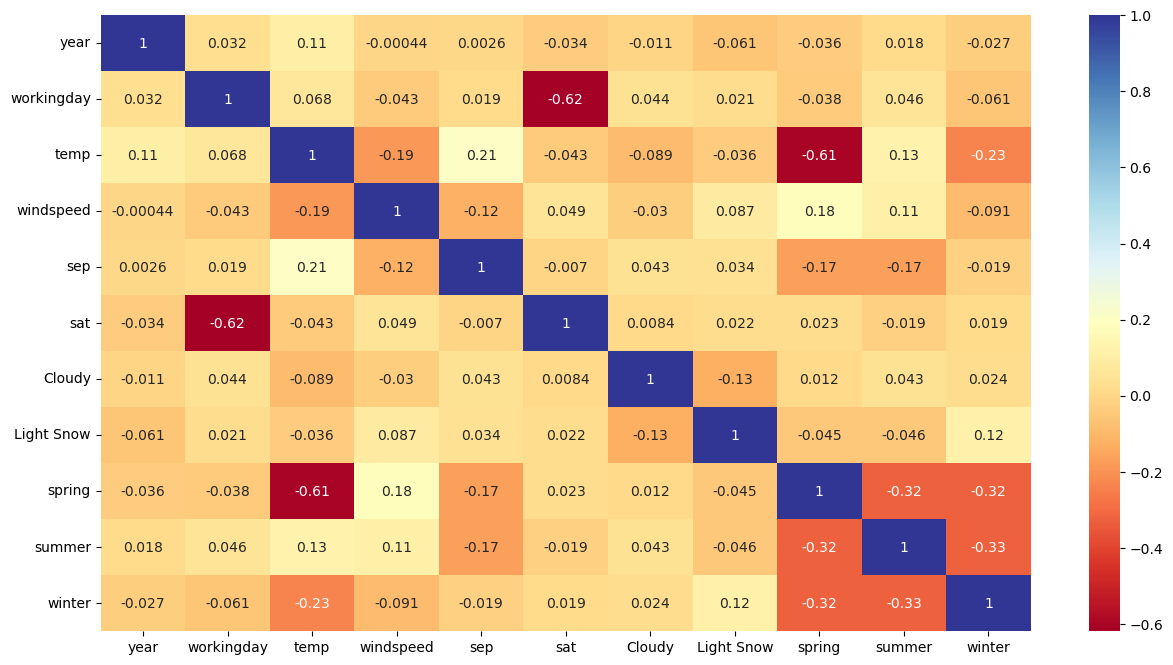

In [408]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_data.corr(), annot=True, cmap="RdYlBu")
plt.show()

VIF values are less than 5 which is a good sign and mutlicolinearity is also not seen.

#### Checking the Linearity

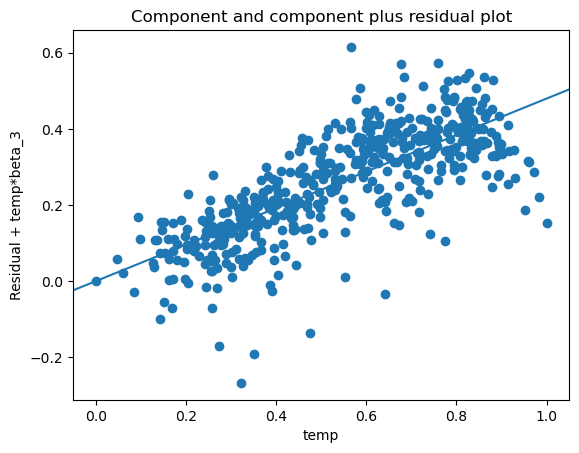

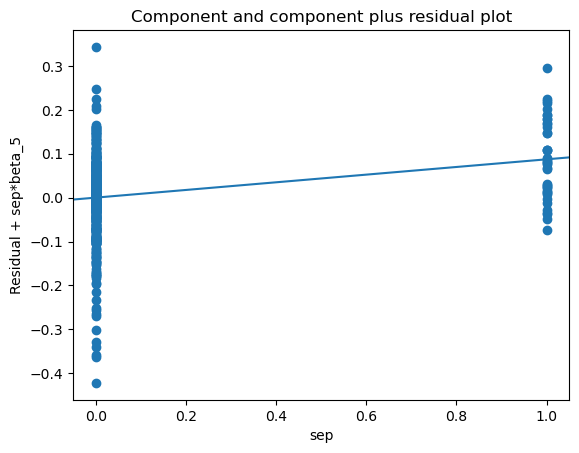

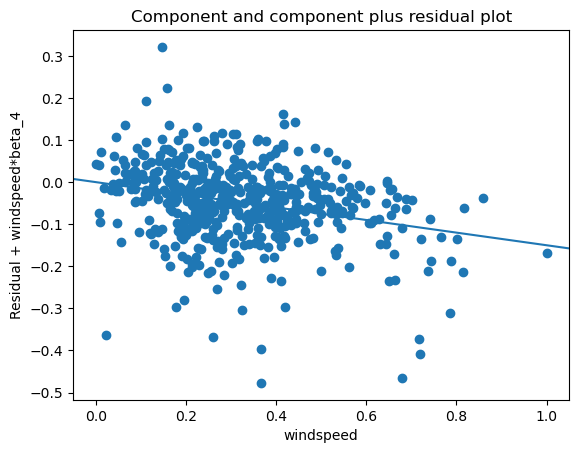

In [409]:
# Validating the linear relationship using the CCPR plot.
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_4, 'temp')

sm.graphics.plot_ccpr(lr_4, 'sep')
sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

We can see the linearity from above given visualisations.

### Homoscedasticity

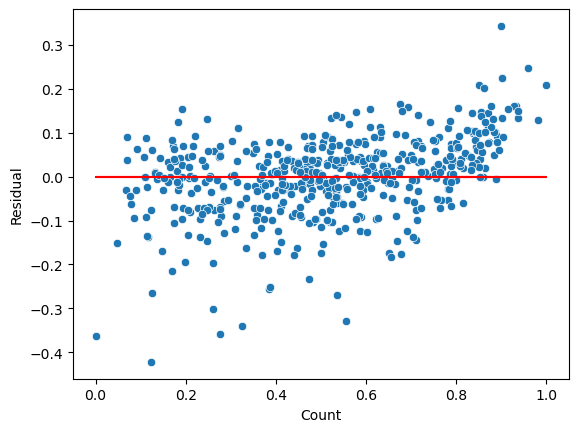

In [410]:
y_train_pred = lr_4.predict(X_train_lm_4)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

There is no visible pattern observed from above plot for residuals.

#### Independence of residuals

Durbin-Watson value of final model lr_4 is 2.085, which means there is no autocorrelation.

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, Let's go ahead and make predictions using the final, i.e. 4th model.

In [411]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thur,tue,wed,Cloudy,Light Snow,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [412]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thur,tue,wed,Cloudy,Light Snow,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [413]:
y_test = df_test.pop('cnt')
X_test = df_test


In [414]:
col1 = X_train_data.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)


In [415]:
y_pred = lr_4.predict(X_test_lm_4)

In [418]:
r2 = r2_score(y_test, y_pred)
round(r2, 4)

0.8063

### Model Evaluation

Plotting the graph for real vs predicted values

Text(0, 0.5, 'y_pred')

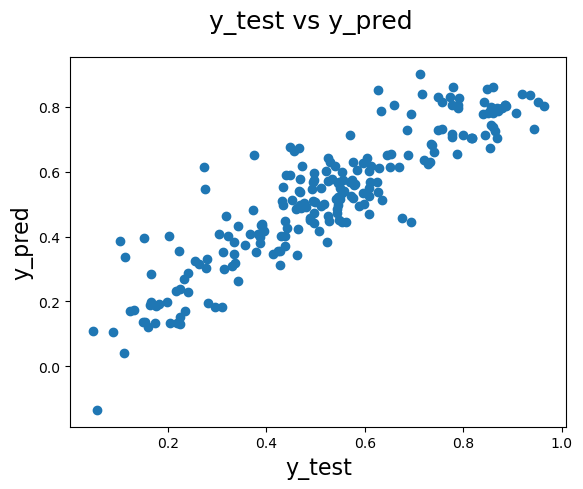

In [421]:
#let's plot the y_test and y_pred to see the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=18)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16)

In [422]:
round(lr_4.params, 4)

const         0.1406
year          0.2344
workingday    0.0555
temp          0.4796
windspeed    -0.1500
sep           0.0873
sat           0.0667
Cloudy       -0.0804
Light Snow   -0.2893
spring       -0.0554
summer        0.0626
winter        0.0958
dtype: float64

We can see that the equation of our best fitted line is:

cnt = 0.1406+0.2344 x year + 0.0555 X workingday+0.4796 x temp - 0.1500 x windspeed + 0.0873 x sep + 0.0667 x sat -0.0804 x Cloudy -0.2893xLight Snow-0.0554 x spring + summer x 0.0626+ 0.0958x winter 

In [425]:
#Let's calculate the adjusted r2

adjusted_r2 = round(1- (1-r2) * (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7961


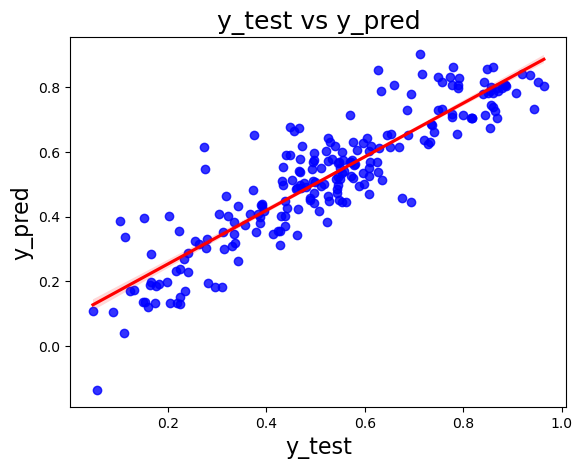

In [426]:
# Let's visualise the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=18)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparison between training and testing dataset

#### The booking of bikes depend on year, workingday, temp, windspeed, sep, sat, Cloudy, Light Snow ,spring, summer, winter       